# 朴素贝叶斯
* 一种分类方法
* 朴素贝叶斯法是一种基于贝叶斯定理与特征条件独立假设的分类方法。其中朴素指的就是条件独立。朴素贝叶斯在分类的时候不是直接返回分类，而是返回属于某个分类的概率。

**条件独立**
* 两个随机变量 X 和 Y 在给定第三个随机变量 Z 的情况下条件独立当且仅当它们在给定 Z 时的条件概率分布互相独立，也就是说，给定Z的任一值，X 的概率分布和Y的值无关，Y 的概率分布也和X的值无关。
$$P(X, Y | Z) = P(X | Z) P(Y | Z)$$
$$等价于$$
$$P(X∣Y,Z)=P(X∣Z)$$
$$P(Y∣X,Z)=P(Y∣Z)$$

**贝叶斯定理**
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$ 

* $P(A|B)$是指事件B发生的情况下A发生的概率,已知B发生后，A的条件概率，称为A的后验概率
* P(A)是A的先验概率或边缘概率
* P(B|A)是一致A发生后B的条件概率，是B的后验概率
* P(B)是B的先验概率或边缘概率
* 按这些术语,贝叶斯定理可以表述为
    * 后验概率 = (似然性 * 先验概率)/标准化常量
    * 也就是说,后验概率与先验概率和相似度的乘积成正比.
    * 同时,分母P(B),可以根据全概率公式分解为: $$ P(B)=\sum_{i=1}^nP(Ai)P(B|Ai)$$ 

**分类**
* 使用最大后验概率估计。朴素贝叶斯分类算法有一个前提条件——假设各特征变量之间是条件独立的，这也是被称为“朴素”的原因。
* 
$$h(x) = \arg\max_k (k|x) $$
$$= \arg\max_k P(k|x_1, x_2, \ldots, x_p)$$
$$= \arg\max_k \frac{P(k) P(x_1, x_2, \ldots, x_p | k)}{P(x_1, x_2, \ldots, x_p | k)}$$
$$= \arg\max_k P(k) P(x_1, x_2, \ldots, x_p | k)$$
$$= \arg\max_k P(k)P(x_1 | k) P(x_2 | k) \ldots P(x_p | k)$$
$$= \arg\max_k P(k) \prod_{i=1}^p P(x_i | k)$$
* $$P(C|F1,...F_n) = \frac{1}{Z}P(C)* \prod \limits_{i}^nP(F_i|C)$$
$$Z只依赖F1,...F_n,当特征变量已知时Z是个常数$$
* 针对不同的概率分布可以得到不同的朴素贝叶斯分类方法。常见的算法包括：多项式朴素贝叶斯分类、高斯朴素贝叶斯分类、伯努利朴素贝叶斯分类等。


**多项式朴素贝叶斯**
* 使用范围：主要用于文本分类和文档分类任务，例如垃圾邮件检测、情感分析、文本主题分类等。它在这些任务中通常用于处理文本数据的**离散特征**，例如单词计数或词袋模型中的特征。

**伯努利朴素贝叶斯**
* 使用范围：也主要用于文本分类，但与多项式朴素贝叶斯不同，它适用于二进制特征，例如文档中是否包含某个词汇。因此，它适用于**二元特征**(0/1)的情况，通常在文本二分类问题中使用。

**高斯朴素贝叶斯**
* 使用范围：主要用于处理**连续特征数据**，例如数值数据。它假设每个类别的特征值服从高斯分布（正态分布），因此适用于处理连续型数据的分类问题。常见的应用包括模式识别、数据挖掘和图像分类等领域。

# MultinomialNB 多项式朴素贝叶斯
**多项式朴素贝叶斯分类**
* 多项式朴素贝叶斯分类是假设样本服从多项式分布（multinomial distribution），是通过特征出现的频率来估计特征的概率，根据大数定律（law of large numbers），当样本数据越多，事件出现的频率趋于稳定后，频率即为事件的概率。
* 分类为 k 的概率可以通过分类 k 在所有样本中出现的频率来估计，即分类为k的样本数 N_k 除以总样本数 N。在分类为 k 时，第 i 个特征为 x_i 的概率等于分类为 k 并且特征为 x_i 的样本数除以分类为 k 的样本数 N_k，数学表达式如下：
$$P(k)= \frac{N_k}{N}$$
$$P(x_i | k) =\frac{N_{kx_i}}{N_k}$$
* 但当一种特征中某个分类下没有出现过，会发现用上面的方式计算出的概率为零，这会使得最后的后验概率也等于零。
* 对数据做平滑处理，在计算频率时引入一个平滑参数来避免计算中出现 0 的问题，数学表达式如下：
$$P(k) = \frac{N_k + \alpha}{N + M_\alpha}$$
$$P(x_i|k) = \frac{N_{kxi} + \alpha}{N_k + M_i\alpha}$$
其中 α 为平滑参数，M 为分类的数量，M_i 为第 i 个特征的类型数量。
该方式被称为拉普拉斯平滑（Laplace smoothing）。当样本数足够多时，即 N >> M，这种平滑处理对结果的影响较小。

**python实现多项式朴素贝叶斯分类**

核心点
* 计算类别先验概率：计算每个类别的先验概率 P(y)。
* 计算类别条件概率：对于每个类别，计算每个特征（词汇项）在该类别下的条件概率 P(x_i|y)。这可以通过统计每个特征在该类别下的出现次数来估计。
* 通过类别先验概率和条件概率，可以算出特征的后验概率

In [26]:
import numpy as np

class MultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # 拉普拉斯平滑参数
        self.class_priors = None
        self.class_conditionals = None
        self.unique_classes = None

    def fit(self, X, y):
        self.unique_classes, class_counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        self.class_priors = (class_counts + self.alpha) / (total_samples + self.alpha * len(self.unique_classes))

        num_features = X.shape[1]
        self.class_conditionals = {}

        for c in self.unique_classes:
            class_samples = X[y == c]
            feature_counts = np.sum(class_samples, axis=0)
            self.class_conditionals[c] = (feature_counts + self.alpha) / (np.sum(class_samples) + self.alpha * num_features)

    def predict(self, X):
        predictions = []

        for sample in X:
            posteriors = []

            for c in self.unique_classes:
                prior = self.class_priors[c]
                likelihood = np.prod(self.class_conditionals[c] ** sample)
                posterior = prior * likelihood
                posteriors.append(posterior)

            predicted_class = np.argmax(posteriors)
            predictions.append(predicted_class)

        return predictions


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练多项式朴素贝叶斯模型
nb_classifier = MultinomialNaiveBayes(alpha=1.0)
nb_classifier.fit(X_train, y_train)

# 进行预测
y_pred = nb_classifier.predict(X_test)

# 评估性能并生成报告
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



**sklearn集成**

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练多项式朴素贝叶斯模型，并应用拉普拉斯平滑
alpha = 1.0  # 拉普拉斯平滑参数
nb_classifier = MultinomialNB(alpha=alpha)
nb_classifier.fit(X_train, y_train)

# 进行预测
y_pred = nb_classifier.predict(X_test)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



# BernoulliNB 伯努利朴素贝叶斯
**伯努利分布**
* 伯努利分布,又叫做两点分布或0-1分布,是一个离散型概率分布.称随机变量X有伯努利分布,参数为p(0< p <1),它分别以概率p和1-p取1和0为值.
* $$P(X = x) = \begin{cases} p & \text{if } x = 1 \\ 1 - p & \text{if } x = 0
\end{cases}$$


**多元伯努利分布**
* $$P(x_1 = k_1, x_2 = k_2, \ldots, x_n = k_n) = \frac{n!}{k_1! k_2! \ldots k_n!} p_1^{k_1} p_2^{k_2} \ldots p_n^{k_n}$$

**伯努利贝叶斯**
* 假设特征满足多元伯努利分布
* 类似于多项式贝叶斯，只是标签的先验概率和后验概率计算方法不一样
* 例如文本分类
$$多项式贝叶斯$$
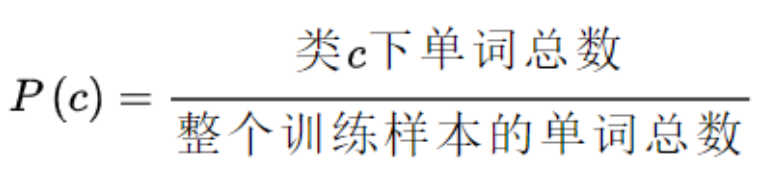
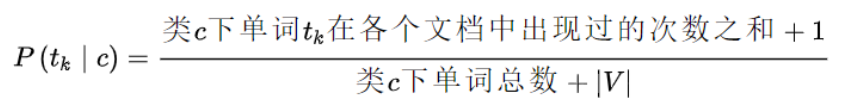
$$伯努利贝叶斯$$
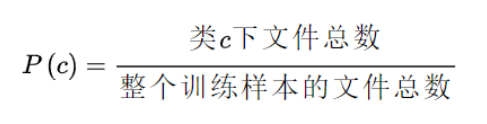
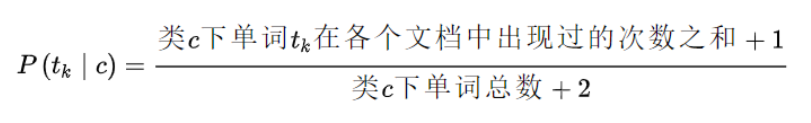

**python实现**

In [10]:
import numpy as np

class BernoulliNBClassifier:
    # 创建实验数据集
    def loadDataSet(self):
        dataSet=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']] #切分好的词条
        classVec = [0,1,0,1,0,1] #类别标签向量，1代表侮辱性词汇，0代表非侮辱性词汇
        return dataSet,classVec
    # 创建词汇表
    # 将词条中重复的词去掉，创建无词汇重复的词汇表
    def createVocabList(self, dataSet):
        vocabSet = set() #创建一个空的集合
        for doc in dataSet: #遍历dataSet中的每一条言论
            vocabSet = vocabSet | set(doc) #取并集
            vocabList = list(vocabSet)
        return vocabList
    # 获得训练集向量
    # 根据vocabList词汇表，将inputSet向量化，向量的每个元素为1或0
    
    def setOfWords2Vec(self, vocabList, inputSet):
        """
        参数说明：

        ​ vocabList：词汇表

        ​ inputSet：切分好的词条列表中的一天

        返回：

        ​ returnVec：文档向量
        """
        returnVec = [0] * len(vocabList) #创建一个其中所含元素都为0的向量
        for word in inputSet: #遍历每个词条
            if word in vocabList: #如果词条存在于词汇表中，则变为1
                returnVec[vocabList.index(word)] = 1
            else:
                print(f"{word} is not in my Vocabulary!")
        return returnVec #返回文档向量
    # 生成训练集向量列表
    def get_trainMat(self, dataSet):
        """
        参数说明：

        ​ dataSet：切分好的词条

        返回：

        ​ trainMat：所有的词条向量组成的表
        """
        trainMat = [] #初始化向量列表
        vocabList = self.createVocabList(dataSet) #生成词汇表
        for inputSet in dataSet: #遍历样本词条中的每一条样本
            returnVec = self.setOfWords2Vec(vocabList, inputSet) #将当前词条向量化
            trainMat.append(returnVec) #追加到向量列表中
        return trainMat

    def trainNB(self, trainMat, classVec):
        """
        参数说明：

        ​ trainMat：训练文本矩阵

        ​ classVec：训练类别标签向量

        返回：

        ​ p0V：非侮辱类的条件概率数组

        ​ p1V：侮辱类的条件概率数组

        ​ pAb：文档属于侮辱类的概率（侮辱类的先验概率）
        """
        n = len(trainMat) #计算训练的文档数目
        m = len(trainMat[0]) #计算每篇文档的词条数
        pAb = sum(classVec) / n #文档属于侮辱类的概率
        p0Num = np.ones(m) #词条出现数初始化为1
        p1Num = np.ones(m) #词条出现数初始化为1
        p0Denom = 2 #分母初始化为2
        p1Denom = 2 #分母初始化为2
        for i in range(n): #遍历每一个文档
            if classVec[i] == 1: #统计属于侮辱类的条件概率所需的数据
                p1Num += trainMat[i]
                p1Denom += sum(trainMat[i])
            else: #统计属于非侮辱类的条件概率所需的数据
                p0Num += trainMat[i]
                p0Denom += sum(trainMat[i])
        p1V = np.log(p1Num / p1Denom)
        p0V = np.log(p0Num / p0Denom)
        return p0V, p1V, pAb #返回属于非侮辱类、侮辱类和文档属于侮辱类的概率

    def classifyNB(self, vec2Classify, p0V, p1V, pAb):
        """
        参数说明：

        ​ vec2Classify：待分类的词条数组

        ​ p0V：非侮辱类的条件概率数组

        ​ p1V：侮辱类的条件概率数组

        ​ pAb：文档属于侮辱类的概率（侮辱类的先验概率）

        返回：

        ​ 0：非侮辱类

        ​ 1：侮辱类
        """
        p1 = sum(vec2Classify * p1V) + np.log(pAb)    #对应元素相乘
        p0 = sum(vec2Classify * p0V) + np.log(1 - pAb) #对应元素相乘
        if p1 > p0:
            return 1
        else:
            return 0

    def testingNB(self, testVec):
        """
        参数说明：

        ​ testVec：测试样本

        返回：

        ​ 测试样本的类别
        """
        dataSet, classVec = self.loadDataSet() #创建实验样本
        vocabList = self.createVocabList(dataSet) #创建词汇表
        trainMat = self.get_trainMat(dataSet) #将实验样本向量化
        p0V, p1V, pAb = self.trainNB(trainMat, classVec) #训练朴素贝叶斯分类器
        thisone = self.setOfWords2Vec(vocabList, testVec) #测试样本向量化
        if self.classifyNB(thisone, p0V, p1V, pAb) == 1:
            print(testVec, '属于侮辱类') #执行分类并打印分类结果
        else:
            print(testVec, '属于非侮辱类') #执行分类并打印分类结果

if __name__ == "__main__":
    nb_classifier = BernoulliNBClassifier()
    
    testVec1 = ['love', 'my', 'dalmation']
    nb_classifier.testingNB(testVec1)
    
    testVec2 = ['stupid', 'garbage']
    nb_classifier.testingNB(testVec2)


['love', 'my', 'dalmation'] 属于非侮辱类
['stupid', 'garbage'] 属于侮辱类


**sklearn集成**

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# 创建训练集和测试集
train_data = ["my dog has flea problems help please",
              "maybe not take him to dog park stupid",
              "my dalmation is so cute I love him",
              "stop posting stupid worthless garbage",
              "mr licks ate my steak how to stop him",
              "quit buying worthless dog food stupid"]
train_labels = [0, 1, 0, 1, 0, 1]  # 0代表非侮辱性词汇，1代表侮辱性词汇

test_data = ["love my dalmation", "stupid garbage"]
test_labels = [0, 1]  # 测试数据的真实标签

# 将文本数据转换为特征向量
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

# 创建伯努利朴素贝叶斯模型
bnb_classifier = BernoulliNB()

# 训练模型
bnb_classifier.fit(X_train, train_labels)

# 进行预测
y_pred = bnb_classifier.predict(X_test)

# 评估性能
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(test_labels, y_pred, target_names=["non-abusive", "abusive"], zero_division=1.0)
print("Classification Report:")
print(report)

for (i, text) in enumerate(test_data):
    if y_pred[i] == 1:
        print(f"{text} 属于侮辱类")
    else:
        print(f"{text} 属于非侮辱类")
# print(y_pred)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

 non-abusive       1.00      1.00      1.00         1
     abusive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

love my dalmation 属于非侮辱类
stupid garbage 属于侮辱类


# GaussianNB 高斯朴素贝叶斯
**高斯分布**
* $$N(x|\mu,\sigma^2)\frac{1}{\sqrt{2\pi}\sigma}exp^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**高斯贝叶斯**
* 假定每个特征变量的条件概率均服从高斯分布
$$P(x_i|y_c)=\frac{1}{\sqrt{2\pi\sigma_{ci}^2}}exp(-\frac{(x_i-\mu_{ci})^2}{2\sigma_{ci}^2})$$
$$其中x_i表示第i个特征维度，\sigma_{ci}和\mu_{ci}分别表示在类别y=c下特征xi对应的数学期望和方差$$
* 计算每个特征维度的条件概率后，进行极大化后验概率计算
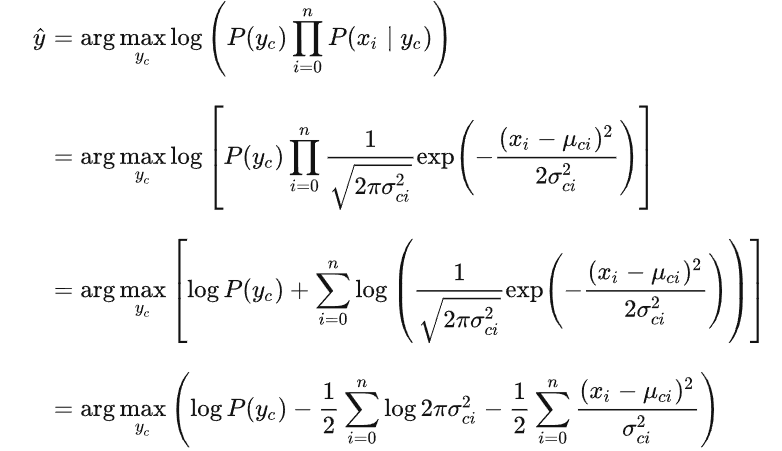

**计算实例**
* 输入
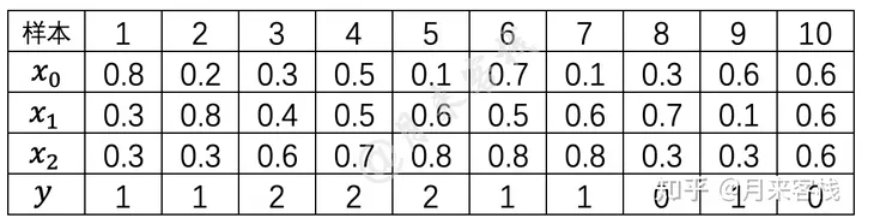
* 预测
$$x=[0.5,0.12,0.218]所属的类别$$
* 计算先验概率
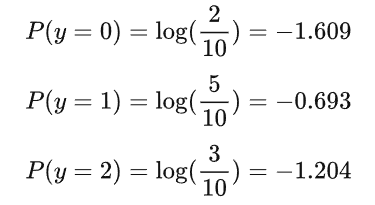
* 计算数学期望和方差
$$例如y=0是特征x_0对应的数学期望和方差$$
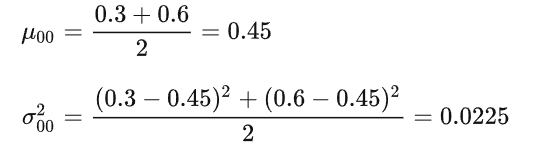
$$每个类别下的期望和方差$$
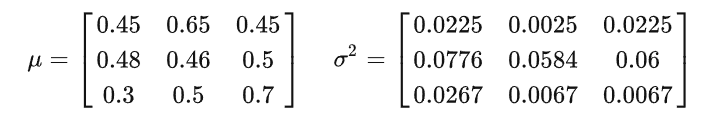
* 计算当x=[0.5,0.12,0.218]，y对应的条件概率
$$y=0的对应的条件概率$$
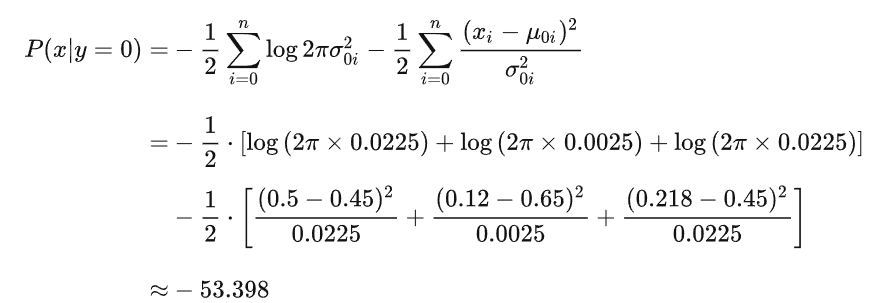
$$**同理**$$
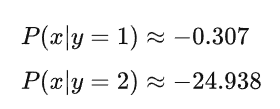
* 计算各自的后验概率
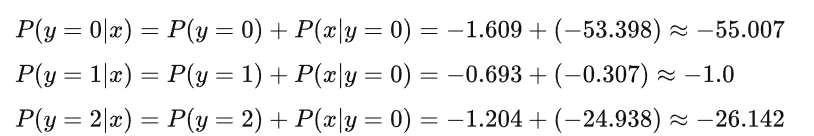
* 最终输入y=1类别，进行softmax操作，输出概率值分别为0， 1.0， 0

**pythobn实现**

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, classification_report

class GaussianNaiveBayes:
    #计算数学期望和方差
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = len(X_cls) / len(X)
    # 计算后验概率
    def predict(self, X):
        predictions = []
        
        for x in X:
            posteriors = {}
            
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                likelihood = np.sum(np.log(norm.pdf(x, self.mean[cls], np.sqrt(self.var[cls]))))
                posteriors[cls] = prior + likelihood
            
            prediction = max(posteriors, key=posteriors.get)
            predictions.append(prediction)
        
        return predictions

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练高斯朴素贝叶斯模型
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# 进行预测
y_pred = gnb.predict(X_test)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**sklearn集成**

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建高斯朴素贝叶斯模型
gnb_classifier = GaussianNB()

# 训练模型
gnb_classifier.fit(X_train, y_train)

# 进行预测
y_pred = gnb_classifier.predict(X_test)

# 评估性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

